## SMILES - Molecules as 2D Strings

SMILES (Simplified Molecular Input Line Entry System) is a well-established
convention for storing molecular structures as text. Here we'll take some time
to learn about SMILES as well as develop some intuition and fluency with
them. 

But first we have some imports to get out of the way. RDKit is a fantastic open-source package written in C++ with Python wrappers. It will power most of our
work today.

In [1]:
from rdkit import Chem

# these options customize how our molecules will look when displayed
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (400,400)
IPythonConsole.ipython_useSVG = True
IPythonConsole.drawOptions.addAtomIndices=False
IPythonConsole.drawOptions.addStereoAnnotation=True
IPythonConsole.drawOptions.baseFontSize=0.7
IPythonConsole.drawOptions.annotationFontScale=1
IPythonConsole.drawOptions.fixedBondLength=20

from rdkit import RDLogger
rdlogger = RDLogger.logger()
rdlogger.setLevel(RDLogger.CRITICAL)

### Atoms in SMILES

First we start with atoms and how they are specified. SMILES allows us to input
the atomic symbol, isotope, charge, and number of hydrogens.

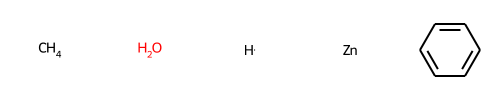

smi:  C             O            [H]           [Zn]           c


In [2]:
smiles = [
    'C',         # as you see atoms are specified by their atomic symbols
    'O',         # RDKit will automatically infer the number of hydrogens
    '[H]',       # specifying a bare hydrogen is unique as it requires brackets
    '[Zn]',      # for specifying two-letter atoms, brackets are also needed
    'c1ccccc1',  # aromatic atoms are specified with lowercase letters
]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]
display(Chem.Draw.MolsToGridImage(
    mols=mols,
    molsPerRow=5,
    subImgSize=(100,100),
    useSVG=True,
))
print('smi:  C             O            [H]           [Zn]           c')

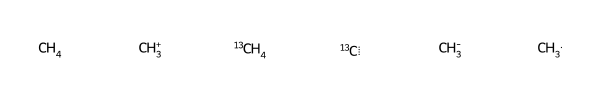

smi:  C           [CH3+]       [13CH4]        [13C]        [CH3-]         [CH3]


In [3]:
smiles = [
    'C',        # besides the atomic symbol, we can specify the number of
    '[CH3+]',   #  hydrogens and the charge of the atom
    '[13CH4]',  # here we specify the isotope with brackets and atomic weight
    '[13C]',    # note that if we specify an isotope, we must specify Hs too
    '[CH3-]',   # we can also specify charge
    '[CH3]',    # if no charge is specified, RDKit will infer a radical
]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]
display(Chem.Draw.MolsToGridImage(
    mols=mols,
    molsPerRow=6,
    subImgSize=(100,100),
    useSVG=True,
))
print('smi:  C           [CH3+]       [13CH4]        [13C]        '
      '[CH3-]         [CH3]')

### Bonds in SMILES

The other type of "primitive" in SMILES is the bond. SMILES allows us to set
the bond type: single, aromatic, double, or triple.

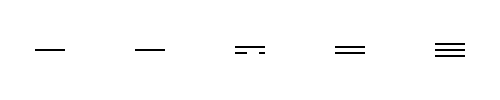

    single        single       aromatic       double       triple


In [4]:
smiles = [
    'C-C',  # the four different bonds types: single,
    'CC',   # note that bond type will be inferred for single and aromatic
    'C:C',  # aromatic,
    'C=C',  # double,
    'C#C',  # triple
]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]
display(Chem.Draw.MolsToGridImage(
    mols=mols,
    molsPerRow=5,
    subImgSize=(100,100),
    useSVG=True,
))
print('    single        single       aromatic       double       triple')

### Linear Molecules in SMILES

Given that SMILES is a *linear* 2D representation, it follows that the easiest
molecules to represent are linear molecules.

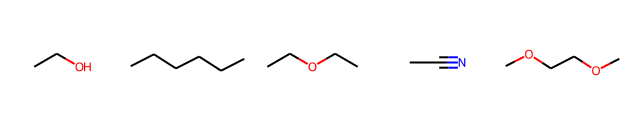

    ethanol          n-hexane        diethyl ether    acetonitrile        glyme


In [5]:
smiles = [
    'CCO',     # here we start with some common organic solvents, can you guess
    'CCCCCC',  #  what molecule each SMILES string is expressing?
    'CCOCC',
    'CC#N',
    'COCCOC',
]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]
display(Chem.Draw.MolsToGridImage(
    mols=mols,
    molsPerRow=5,
    subImgSize=(125,125),
    useSVG=True,
))
print('    ethanol          n-hexane        diethyl ether    acetonitrile'
      '        glyme')

### Branching in SMILES

Linear molecules are nice but most molecules are not purely linear. This is
where SMILES gets interesting (and a little harder to read)!

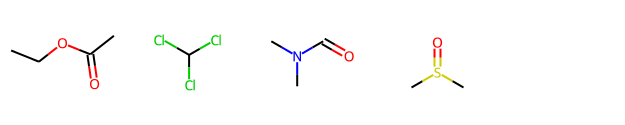

   ethyl acetate     chloroform          DMF              DMSO


In [6]:
# what about a molecule like ethyl acetate?
#     O
#     ‖
#  C--C--O--C--C SMILES: C-C(=O)-O-C-C or CC(=O)OCC
#
# the carbonyl carbon has three atoms coming off of it
# SMILES lets us wrap branched atoms in parenthesis

smiles = [
    'CC(=O)OCC',    # here are a few more organic solvents, try to guess them!
    'ClC(Cl)(Cl)',
    'CN(C)C=O',
    'CS(=O)C',
]

mols = [Chem.MolFromSmiles(smi) for smi in smiles]
display(Chem.Draw.MolsToGridImage(
    mols=mols,
    molsPerRow=5,
    subImgSize=(125,125),
    useSVG=True,
))
print('   ethyl acetate     chloroform          DMF              DMSO')

## Rings in SMILES

The last type of structure we have yet to specify is rings! Rings in SMILES
are denoted by specifying which atoms in a chain are linked to form the ring.

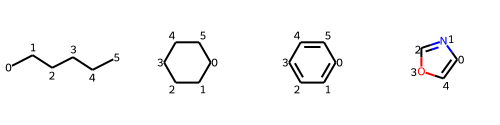

    n-hexane        cyclohexane         benzene           oxazole


In [7]:
# what about a molecule like cyclohexane?
#     C---C            C---C
#    ╱     ╲          ╱     ╲
#   C       C  ===>  C       C1
#    ╲     ╱          ╲     
#     C---C            C---C1
#
# SMILES stores "broken rings" where the positions of ring-forming atoms/bonds
#  are stored with numbers

smiles = [
    'C-C-C-C-C-C',   # here we have a chain of atoms labeled 0-5
#    0 1 2 3 4 5
    'C1-C-C-C-C-C1', # now by writing C1-...-C1, we connect atom 0 with atom 5
#    0  1 2 3 4 5       to create our ring!
    'c1ccccc1',      # here is an aromatic ring, benzene
    'c1ncoc1',       # here is another aromatic ring, oxazole
]

IPythonConsole.drawOptions.addAtomIndices=True
mols = [Chem.MolFromSmiles(smi) for smi in smiles]
display(Chem.Draw.MolsToGridImage(
    mols=mols,
    molsPerRow=4,
    subImgSize=(125,125),
    useSVG=True,
))
print('    n-hexane        cyclohexane         benzene           oxazole')

### Putting it all together!

Now that we understand all the principles of SMILES, we can put them together
to create any molecule.

Okay not ANY molecule, SMILES does have its limitations. Also SMILES does allow
specifying atom and bond chirality (not covered here). But this is enough for
us to get started working with SMILES strings.

See if you can pick out what letters in the SMILES correspond to what structures
in the drug molecule below.

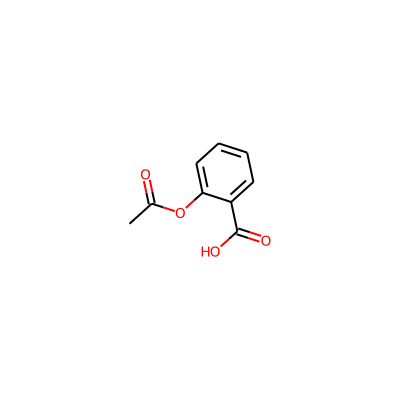

SMILES: CC(=O)Oc1ccccc1C(=O)O
aspirin


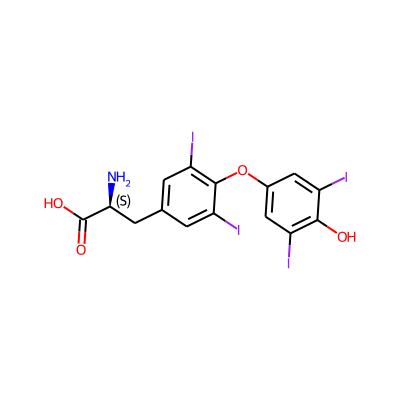

SMILES: N[C@@H](Cc1cc(I)c(Oc2cc(I)c(O)c(I)c2)c(I)c1)C(=O)O
levothyroxine


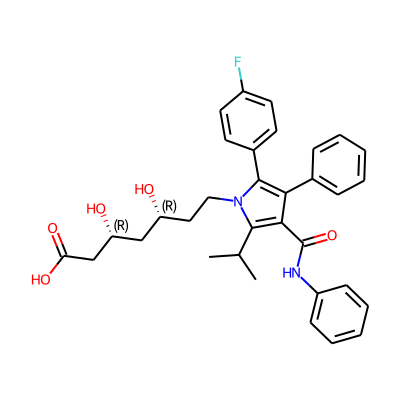

SMILES: CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F)cc2)n1CC[C@@H](O)C[C@@H](O)CC(=O)O
avorstatin


In [8]:
IPythonConsole.drawOptions.addAtomIndices=False

aspirin = 'CC(=O)OC1=CC=CC=C1C(=O)O'
aspirin = Chem.MolFromSmiles(aspirin)
display(aspirin)
print(f'SMILES: {Chem.MolToSmiles(aspirin)}')
print('aspirin')

levothyroxine = 'N[C@@H](Cc1cc(I)c(Oc2cc(I)c(O)c(I)c2)c(I)c1)C(=O)O'
levothyroxine = Chem.MolFromSmiles(levothyroxine)
display(levothyroxine)
print(f'SMILES: {Chem.MolToSmiles(levothyroxine)}')
print('levothyroxine')

avorstatin = 'CC(C)c1c(C(=O)Nc2ccccc2)c(-c2ccccc2)c(-c2ccc(F)cc2)n1CC[C@@H](O)C[C@@H](O)CC(=O)O'
avorstatin = Chem.MolFromSmiles(avorstatin)
display(avorstatin)
print(f'SMILES: {Chem.MolToSmiles(avorstatin)}')
print('avorstatin')